In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ls 'drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/2_Output_kpi_gen'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import *

In [0]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [0]:
data = ['date_time_snr_h03.xlsx',
        '001_snr_h03.baa10.ce311.xq01.xlsx',
        '002_snr_h03.baa10.ce312.xq01.xlsx',
        '003_snr_h03.mey40.cs001.xq01.xlsx',
        '006_snr_h03.pcb80.cf001.xq01.xlsx',
        '007_1_snr_h03.pcb80.ct005.xq01.xlsx',
        '007_2_snr_h03.pcb80.ct002.xq01.xlsx',
        '008_1_snr_h03.mka81.ct001.xq01.xlsx',
        '008_2_snr_h03.mka82.ct001.xq01.xlsx',
        '009_1_snr_h03.mka81.ct002.xq01.xlsx',
        '009_2_snr_h03.mka82.ct002.xq01.xlsx',
        '010_1_snr_h03.mka81.ct003.xq01.xlsx',
        '010_2_snr_h03.mka82.ct003.xq01.xlsx',
        '011_1_snr_h03.mka81.ct004.xq01.xlsx',
        '011_2_snr_h03.mka82.ct004.xq01.xlsx',
        '012_1_snr_h03.mka81.ct005.xq01.xlsx',
        '012_2_snr_h03.mka82.ct005.xq01.xlsx',
        '013_1_snr_h03.mka81.ct006.xq01.xlsx',
        '013_2_snr_h03.mka82.ct006.xq01.xlsx',
        '014_1_snr_h03.mka81.ct007.xq01.xlsx',
        '014_2_snr_h03.mka82.ct007.xq01.xlsx',
        '015_1_snr_h03.mka81.ct008.xq01.xlsx',
        '015_2_snr_h03.mka82.ct008.xq01.xlsx',
        '016_1_snr_h03.mka81.ct009.xq01.xlsx',
        '016_2_snr_h03.mka82.ct009.xq01.xlsx',
        '017_1_snr_h03.mka81.ct010.xq01.xlsx',
        '017_2_snr_h03.mka82.ct010.xq01.xlsx',
        '018_1_snr_h03.mka81.ct011.xq01.xlsx',
        '018_2_snr_h03.mka82.ct011.xq01.xlsx',
        '019_1_snr_h03.mka81.ct012.xq01.xlsx',
        '019_2_snr_h03.mka82.ct012.xq01.xlsx']
        

datalabel = ['date_time_snr_h03.xlsx',
        '001_snr_h03.mka20.ct001.xq01.xlsx',
        '002_snr_h03.mka20.ct002.xq01.xlsx',
        '003_snr_h03.mka20.ct003.xq01.xlsx',
        '004_snr_h03.mka20.ct004.xq01.xlsx',
        '005_snr_h03.mka20.ct005.xq01.xlsx',
        '006_snr_h03.mka20.ct006.xq01.xlsx',
        '007_snr_h03.mka20.ct007.xq01.xlsx',
        '008_snr_h03.mka20.ct008.xq01.xlsx',
        '009_snr_h03.mka20.ct009.xq01.xlsx',
        '010_snr_h03.mka20.ct010.xq01.xlsx',
        '011_snr_h03.mka20.ct011.xq01.xlsx',
        '012_snr_h03.mka20.ct012.xq01.xlsx',
        '013_snr_h03.mka20.ct013.xq01.xlsx',
        '014_snr_h03.mka20.ct014.xq01.xlsx',
        '015_snr_h03.mka20.ct015.xq01.xlsx',
        '016_snr_h03.mka20.ct016.xq01.xlsx',
        '017_snr_h03.mka20.ct017.xq01.xlsx',
        '018_snr_h03.mka20.ct018.xq01.xlsx',
        '019_snr_h03.mka30.ct001.xq01.xlsx',
        '020_snr_h03.mka30.ct002.xq01.xlsx',
        '021_snr_h03.mka30.ct003.xq01.xlsx',
        '022_snr_h03.mka30.ct004.xq01.xlsx',
        '023_snr_h03.mka30.ct005.xq01.xlsx',
        '024_snr_h03.mka30.ct006.xq01.xlsx',
        '025_snr_h03.mka30.ct007.xq01.xlsx',
        '026_snr_h03.mka30.ct008.xq01.xlsx',
        '027_snr_h03.mka30.ct009.xq01.xlsx']


        
df = pd.DataFrame()

for txt in data:
    read_df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/1_Input_gen/'+ txt)

    read_df.index = read_df['id']
    read_df.drop(('id'), axis=1, inplace=True)

    if txt == 'date_time_snr_h03.xlsx':
      print("input")
    else:
      indexNames = read_df[read_df['status'] == 'BAD'].index
      read_df.drop(indexNames , inplace=True)
      read_df.drop(('status'), axis=1, inplace=True)
    df = pd.concat([df, read_df], axis=1, sort=False)

for txt in datalabel:
    read_df = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/2_Output_kpi_gen/'+ txt)

    read_df.index = read_df['id']
    read_df.drop(('id'), axis=1, inplace=True)

    if txt == 'date_time_snr_h03.xlsx':
      print("label")
    else:
      indexNames = read_df[read_df['status'] == 'BAD'].index
      read_df.drop(indexNames , inplace=True)
      read_df.drop(('status'), axis=1, inplace=True)
    df = pd.concat([df, read_df], axis=1, sort=False)
    
df.dropna(inplace=True)
df.columns = range(df.shape[1])

In [0]:
from google.colab import files
df.to_csv('INPUT.csv')
files.download('INPUT.csv')

In [0]:
df = pd.read_csv('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/1_Input_gen/stator_input_label.csv')
df.index = df['id']
df.drop(('id'), axis=1, inplace=True)
df.shape

(109989, 32)

In [0]:
print(df.shape[0]%299)
part = df.shape[0]%299
df = df.iloc[:-part,:]
print(df.shape)

0

In [0]:
df = df.iloc[:-113,:]
print(df.iloc[:,1:].shape)
df = df.iloc[:,1:].values.reshape(-1,288,31).transpose(0,1,2)
df.shape

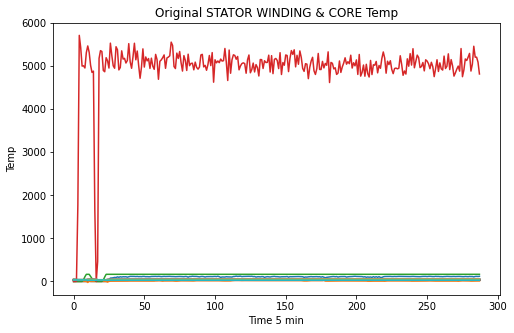

In [0]:
### PLOT ORIGINAL TEMPERATURE DATA ###

plt.figure(figsize=(8,5))
plt.plot(df[0])
plt.title('Original STATOR WINDING & CORE Temp')
plt.ylabel('Temp'); plt.xlabel('Time 5 min')
np.set_printoptions(False)

In [0]:
# label = pd.read_excel('drive/My Drive/10_Predictive/Pmd_for_Hydro_Plant/data/1_Generator_Stator/3_Alarm/002_snr_h03.pcb80.ct004.xm01_Good.xlsx')
# label.index = label['id']
# label.drop(('id'), axis=1, inplace=True)
# indexNames = label[label['status'] == 'BAD'].index
# label.drop(indexNames , inplace=True)
# label.drop(('status'), axis=1, inplace=True)
# label

In [0]:
label.columns = ['Cooler','Valve','Pump','Accumulator','Flag']

In [0]:
### LABEL DISTRIBUTION ###
label = label.Cooler
label.value_counts()